# StyleGAN2-ADA-PyTorch

**Notes**
* Training section should be fairly stable. I’ll slowly add features but it should work for most mainstream use cases
* Inference section is a work in progress. If you come across bug or have feature requests please post them in [Slack](https://ml-images.slack.com/archives/CLJGF384R) or on [Github](https://github.com/dvschultz/stylegan2-ada-pytorch/issues)

---

If you find this notebook useful, consider signing up for my [Patreon](https://www.patreon.com/bustbright) or [YouTube channel](https://www.youtube.com/channel/UCaZuPdmZ380SFUMKHVsv_AA/join). You can also send me a one-time payment on [Venmo](https://venmo.com/Derrick-Schultz).

## Setup

Let’s start by checking to see what GPU we’ve been assigned. Ideally we get a V100, but a P100 is fine too. Other GPUs may lead to issues.

In [ ]:
!nvidia-smi 

Wed Apr 28 13:27:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls 


colab-sg2-ada-pytorch  sample_data


Next let’s connect our Google Drive account. This is optional but highly recommended.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls 

colab-sg2-ada-pytorch  drive  sample_data


## Install repo

The next cell will install the StyleGAN repository in Google Drive. If you have already installed it it will just move into that folder. If you don’t have Google Drive connected it will just install the necessary code in Colab.

In [11]:

!mkdir colab-sg2-ada-pytorch
%cd colab-sg2-ada-pytorch
!git clone https://github.com/cordob/stylegan2-ada-pytorch
%cd stylegan2-ada-pytorch
!mkdir downloads
!mkdir datasets
!mkdir pretrained
!mkdir training_runs


!pip install ninja opensimplex

mkdir: cannot create directory ‘colab-sg2-ada-pytorch’: File exists
/content/colab-sg2-ada-pytorch
fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.
/content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
mkdir: cannot create directory ‘downloads’: File exists
mkdir: cannot create directory ‘datasets’: File exists
mkdir: cannot create directory ‘pretrained’: File exists
mkdir: cannot create directory ‘training_runs’: File exists


In [10]:
!pwd

/content


In [12]:
!ls

calc_metrics.py  docker_run.sh	metrics       render.py		 train.py
cmd		 docs		out	      SG2_T_colab.ipynb  videos
datasets	 downloads	pretrained    style_mixing.py
dataset_tool.py  generate.py	projector.py  torch_utils
dnnlib		 legacy.py	__pycache__   training
Dockerfile	 LICENSE.txt	README.md     training_runs


generate images from prtained


In [ ]:
!python generate.py --outdir=out --trunc=0.7 --seeds=6100-6135 --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl 

In [21]:
!ls out

seed6100.png  seed6108.png  seed6116.png  seed6124.png	seed6132.png
seed6101.png  seed6109.png  seed6117.png  seed6125.png	seed6133.png
seed6102.png  seed6110.png  seed6118.png  seed6126.png	seed6134.png
seed6103.png  seed6111.png  seed6119.png  seed6127.png	seed6135.png
seed6104.png  seed6112.png  seed6120.png  seed6128.png
seed6105.png  seed6113.png  seed6121.png  seed6129.png
seed6106.png  seed6114.png  seed6122.png  seed6130.png
seed6107.png  seed6115.png  seed6123.png  seed6131.png


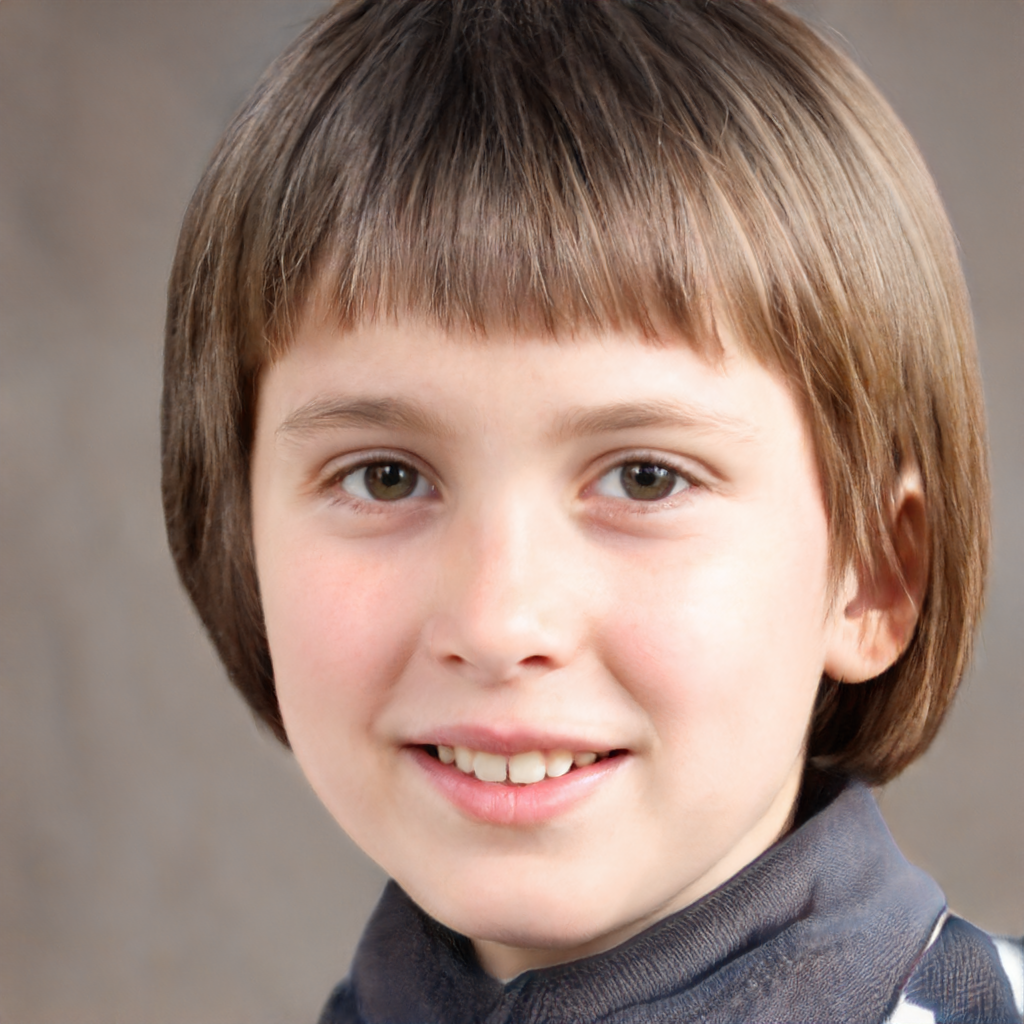

In [19]:
from google.colab import files
from IPython import display
display.Image("out/seed6101.png",
              width=1000)

In [29]:
!ffmpeg -framerate 2 -pattern_type glob -i 'out/*.png' \
  -c:v libx264 out3.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [30]:
from google.colab import files
files.download('out3.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!python render.py --mp4_fps 30 --filename test --duration_sec 5 --network_pkl  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Generating latent vectors...
[150, 1, 512]
Rendering...
truncation_psi = 1 , noise_mode = none
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [17]:
!ls videos

video download 


In [15]:
from google.colab import files
files.download('videos/seed1619653880.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!rm videos/*.*

local file upload !!

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tland.zip to tland (1).zip


KeyboardInterrupt: ignored

In [20]:
!ls




calc_metrics.py  docker_run.sh	metrics       render.py		 train.py
cmd		 docs		out	      SG2_T_colab.ipynb  videos
datasets	 downloads	pretrained    style_mixing.py
dataset_tool.py  generate.py	projector.py  torch_utils
dnnlib		 legacy.py	__pycache__   training
Dockerfile	 LICENSE.txt	README.md     training_runs


In [ ]:
!ls
!mkdir tland
!unzip tland.zip 

In [ ]:
!ls tland

In [ ]:
!python dataset_tool.py --source=tland --dest=tland2.zip

In [ ]:
!ls

In [ ]:
!python train.py --outdir=training_runs --data=tland2.zip --gpus=1 --workers=3 --snap=5

## Dataset Preparation

Upload a .zip of square images to the `datasets` folder. Previously you had to convert your model to .tfrecords. That’s no longer needed :)

## Train model

Below are a series of variables you need to set to run the training. You probably won’t need to touch most of them.

* `dataset_path`: this is the path to your .zip file
* `resume_from`: if you’re starting a new dataset I recommend `'ffhq1024'` or `'./pretrained/wikiart.pkl'`
* `mirror_x` and `mirror_y`: Allow the dataset to use horizontal or vertical mirroring.

In [ ]:
!python train.py --gpus=1 --cfg=$config --metrics=None --outdir=./results --data=$dataset_path --snap=$snapshot_count --resume=$resume_from --augpipe=$augs --initstrength=$aug_strength --gamma=$gamma_value --mirror=$mirror_x --mirrory=False --nkimg=$train_count

### Resume Training

Once Colab has shutdown, you’ll need to resume your training. Reset the variables above, particularly the `resume_from` and `aug_strength` settings.

1. Point `resume_from` to the last .pkl you trained (you’ll find these in the `results` folder)
2. Update `aug_strength` to match the augment value of the last pkl file. Often you’ll see this in the console, but you may need to look at the `log.txt`. Updating this makes sure training stays as stable as possible.
3. You may want to update `train_count` to keep track of your training progress.

Once all of this has been reset, run that variable cell and the training command cell after it.

## Convert Legacy Model

If you have an older version of a model (Tensorflow based StyleGAN, or Runway downloaded .pkl file) you’ll need to convert to the newest version. If you’ve trained in this notebook you do **not** need to use this cell.

`--source`: path to model that you want to convert

`--dest`: path and file name to convert to.

In [ ]:
!python legacy.py --source=/content/drive/MyDrive/runway.pkl --dest=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/runway.pkl

## Testing/Inference

Also known as "Inference", "Evaluation" or "Testing" the model. This is the process of usinng your trained model to generate new material, usually images or videos.

### Generate Single Images

`--network`: Make sure the `--network` argument points to your .pkl file. (My preferred method is to right click on the file in the Files pane to your left and choose `Copy Path`, then paste that into the argument after the `=` sign).

`--seeds`: This allows you to choose random seeds from the model. Remember that our input to StyleGAN is a 512-dimensional array. These seeds will generate those 512 values. Each seed will generate a different, random array. The same seed value will also always generate the same random array, so we can later use it for other purposes like interpolation.

`--truncation`: Truncation, well, truncates the latent space. This can have a subtle or dramatic affect on your images depending on the value you use. The smaller the number the more realistic your images should appear, but this will also affect diversity. Most people choose between 0.5 and 1.0, but technically it's infinite. 


In [ ]:
!python generate.py --outdir=/content/out/images/ --trunc=0.8 --seeds=0-499 --network=/content/drive/MyDrive/network-snapshot-008720.pkl

### Truncation Traversal

Below you can take one seed and look at the changes to it across any truncation amount. -1 to 1 will be pretty realistic images, but the further out you get the weirder it gets.

#### Options 
`--network`: Again, this should be the path to your .pkl file.

`--seeds`: Pass this only one seed. Pick a favorite from your generated images.

`--start`: Starting truncation value.

`--stop`: Stopping truncation value. This should be larger than the start value. (Will probably break if its not).

`--increment`: How much each frame should increment the truncation value. Make this really small if you want a long, slow interpolation. (stop-start/increment=total frames)


In [ ]:
!python generate.py --process="truncation" --outdir=/content/out/trunc-trav-3/ --start=-0.8 --stop=2.8 --increment=0.02 --seeds=470 --network=/content/drive/MyDrive/stylegan2-transfer-models/mixed6k-network-snapshot-016470.pkl

### Interpolations

Interpolation is the process of generating very small changes to a vector in order to make it appear animated from frame to frame.

We’ll look at different examples of interpolation below.

#### Options

`--network`: path to your .pkl file

`--interpolation`: Walk type defines the type of interpolation you want. In some cases it can also specify whether you want the z space or the w space.

`--frames`: How many frames you want to produce. Use this to manage the length of your video.

`--trunc`: truncation value

#### Linear Interpolation

In [ ]:
!python generate.py --outdir=/content/out/video1-w-0.5/ --space="z" --trunc=0.5 --process="interpolation" --seeds=463,470 --network=/content/drive/MyDrive/stylegan2-transfer-models/mixed6k-network-snapshot-016470.pkl --frames=48

In [ ]:
!python generate.py --outdir=out/video1-w/ --space="w" --trunc=1 --process="interpolation" --seeds=85,265,297,849 --network=/content/stylegan2-ada-pytorch/pretrained/wikiart.pkl

In [ ]:
!zip -r vid1.zip /content/out/video1-w-0.5

#### Slerp Interpolation

This gets a little heady, but technically linear interpolations are not the best in high-dimensional GANs. [This github link](https://github.com/soumith/dcgan.torch/issues/14) is one of the more popular explanations ad discussions.

In reality I do not find a huge difference between linear and spherical interpolations (the difference in z- and w-space is enough in many cases), but I’ve implemented slerp here for anyone interested.

Note: Slerp in w space currently isn’t supported. I’m working on it.

In [ ]:
!python generate.py --outdir=out/video1/ --trunc=1 --process="interpolation" --interpolation="slerp" --seeds=85,265,297,849 --network=/content/stylegan2-ada-pytorch/pretrained/wikiart.pkl

#### Noise Loop

If you want to just make a random but fun interpolation of your model the noise loop is the way to go. It creates a random path thru the z space to show you a diverse set of images.

`--interpolation="noiseloop"`: set this to use the noise loop funtion

`--diameter`: This controls how "wide" the loop is. Make it smaller to show a less diverse range of samples. Make it larger to cover a lot of samples. This plus `--frames` can help determine how fast the video feels.

`--random_seed`: this allows you to change your starting place in the z space. Note: this value has nothing to do with the seeds you use to generate images. It just allows you to randomize your start point (and if you want to return to it you can use the same seed multiple times).

Noise loops currently only work in z space.

In [ ]:
!python generate.py --outdir=out/video-noiseloop-0.9d/ --trunc=0.8 --process="interpolation" --interpolation="noiseloop" --diameter=0.9 --random_seed=100 --network=/content/stylegan2-ada-pytorch/pretrained/wikiart.pkl

#### Circular Loop

The noise loop is, well, noisy. This circular loop will feel much more even, while still providing a random loop.

I recommend using a higher `--diameter` value than you do with noise loops. Something between `50.0` and `500.0` alongside `--frames` can help control speed and diversity.

In [ ]:
!python generate.py --outdir=out/video-circularloop/ --trunc=1 --process="interpolation" --interpolation="circularloop" --diameter=800.00 --frames=720 --random_seed=90 --network=/content/stylegan2-ada-pytorch/pretrained/wikiart.pkl

## Projection



*   `--target`: this is a path to the image file that you want to "find" in your model. This image must be the exact same size as your model.
*   `--num-steps`: how many iterations the projctor should run for. Lower will mean less steps and less likelihood of a good projection. Higher will take longer but will likely produce better images.



In [ ]:
!python projector.py --help

In [ ]:
!python projector.py --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00023-chin-morris-mirror-11gb-gpu-gamma50-bg-resumecustom/network-snapshot-000304.pkl --outdir=/content/projector/ --target=/content/img005421_0.png --num-steps=200 --seed=0

### Peter Baylies’ Projector

In [ ]:
!python /content/stylegan2-ada-pytorch/pbaylies_projector.py --help

In [ ]:
!python /content/stylegan2-ada-pytorch/pbaylies_projector.py --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00023-chin-morris-mirror-11gb-gpu-gamma50-bg-resumecustom/network-snapshot-000304.pkl --outdir=/content/projector-no-clip/ --target-image=/content/img005421_0.png --num-steps=200 --use-clip=False --seed=0

## Combine NPZ files together

In [ ]:
!python combine_npz.py --outdir=/content/npz --npzs='/content/projector/projected_w.npz,/content/projector-no-clip/projected_w.npz'

In [ ]:
!python generate.py --help

In [ ]:
!python generate.py --process=interpolation --interpolation=linear --space=w --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00023-chin-morris-mirror-11gb-gpu-gamma50-bg-resumecustom/network-snapshot-000304.pkl --outdir=/content/test/ --projected-w=/content/npz/combined.npz

## Feature Extraction using Closed Form Factorization

Feature Extraction is the process of finding “human readable” vectors in a StyleGAN model. For example, let’s say you wanted to find a vector that could open or close a mouth in a face model.

The feature extractor tries to automate the procss of finding important vectors in your model.

`--ckpt`: This is the path to your .pkl file. In other places its called `--network` (It’s a long story for why its name changed here)
`--out`: path to save your output feature vector file. The file name must end in `.pt`!

In [ ]:
!python closed_form_factorization.py --out=/content/ladies-black-cff.pt --ckpt=/content/drive/MyDrive/network-snapshot-008720.pkl

Once this cell is finished you’ll want to save that `.pt` file somewhere for reuse.

This process just created the vctor values, but we need to test it on some seed values to determine what each vector actually changes. The `apply_factor.py` script does this.

Arguments to try:


*   `-i`: This stands for index. By default, the cell above will produce 512 vectors, so `-i` can be any value from 0 to 511. I recommend starting with a higher value.
*   `-d`: This stands for degrees. This means how much change you want to see along th vector. I recommend a value between 5 and 10 to start with.
*   `--seeds`: You know what these are by now right? :)
*   `--ckpt`: path to your .pkl file
*   `--video`: adding this to your argument will produce a video that animates your seeds along the vector path. I find it much easier to figure out what’s changing with an animation.
*   `--output`: where to save the images/video

Lastly you need to add the path to the `.pt` file you made in th above cell. It’s weird, but you don’t need to add any arguments bfore it, just make sure its after `apply_factor.pt`



In [ ]:
!python apply_factor.py -i 0 -d 10 --seeds 5,10 --ckpt /content/drive/MyDrive/network-snapshot-008720.pkl /content/ladies-black-cff.pt --output /content/cff-vid/ --video

That just produced images or video for a single vector, but there are 511 more! To generate every vector, you can uuse the cell below. Update any arguments you want, but don’t touch the `-i {i}` part.

**Warning:** This takes a long time, especially if you have more than one seed value (pro tip: don’t usee more than one seed value)! Also, this will take up a good amount of space in Google Drive. You’ve been warned!

In [ ]:
for i in range(512):
  !python apply_factor.py -i {i} -d 10 --seeds 177 --ckpt /content/drive/MyDrive/network-snapshot-008720.pkl /content/ladies-black-cff.pt --output /content/drive/MyDrive/ladiesblack-cff-17/ --video #--out_prefix 'ladiesblack-factor-{i}'